# Logistic Regression And Stochastic Gradient Descent

Text(0,0.5,'loss function')

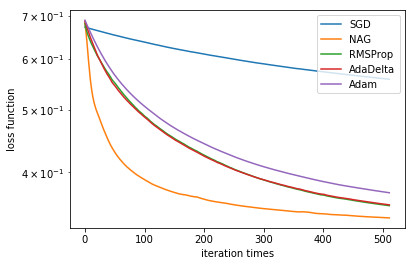

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import random
#读取数据集
X_train,y_train = ds.load_svmlight_file("D:/traindata/a9a.txt")
X_test,y_test = ds.load_svmlight_file("D:/traindata/a9a.t.txt",n_features=123)
X_train = X_train.toarray()
r_train = X_train.shape[0]
#整理样本数据
for i in range(y_train.shape[0]):
    if y_train[i] == -1:
        y_train[i] = 0
X_test = X_test.toarray()
r_test = X_test.shape[0]
#同上
for i in range(y_test.shape[0]):
    if y_test[i] == -1:
        y_test[i] = 0

#参数全零初始化
W = np.zeros([123,])
W1 = np.zeros([123,])
W2 = np.zeros([123,])
W3 = np.zeros([123,])
W4 = np.zeros([123,])
#NAG参数
v = 0
#RMSProp参数
G1 = 0
#AdaDelta参数
delta = 0
G2 = 0
#Adam参数
m = 0
G3 = 0
#学习率
lr = 0.05
#迭代次数
t = 512
#储存迭代中loss值
L_SGD = np.zeros([t])
L_NAG = np.zeros([t])
L_RMSProp = np.zeros([t])
L_AdaDelta = np.zeros([t])
L_Adam = np.zeros([t])
for n in range(t):
    #训练集中使用的样本
    n_train = [random.randint(0,r_train-1) for _ in range(128)]
    
    #梯度初始化
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        g = g + (1/(1+np.exp(-W.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    g = g/len(n_train)
    #批量梯度下降
    W = W - lr*g
    sum_test = 0
    for i in range(r_test):
        sum_test += y_test[i]*np.log(1/(1+np.exp(-W.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-W.T.dot(X_test[i]))))
    #计算miniBatch loss
    L_SGD[n] = -1/r_test*sum_test
    
    #NAG参数
    mu = 0.9
    lr = 0.01
    #NAG
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        g = g + (1/(1+np.exp(-W1.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    g = g/len(n_train)
    v_pre = v
    v = mu*v - lr*g
    W1 = W1 - mu*v_pre + (1+mu)*v
    sum_test = 0
    for i in range(r_test):
        sum_test += y_test[i]*np.log(1/(1+np.exp(-W1.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-W1.T.dot(X_test[i]))))
    #计算NAG loss
    L_NAG[n] = -1/r_test*sum_test
    
    #RMSProp参数
    dr = 0.9
    lr = 0.001
    eps = 1e-8
    #RMSProp
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        g = g + (1/(1+np.exp(-W2.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    g = g/len(n_train)
    G1 = dr*G1 + (1-dr)*g*g
    W2 = W2 - lr/np.sqrt(G1+eps)*g
    sum_test = 0
    for i in range(r_test):
        sum_test += y_test[i]*np.log(1/(1+np.exp(-W2.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-W2.T.dot(X_test[i]))))
    #计算RMSProp loss
    L_RMSProp[n] = -1/r_test*sum_test
    
    #AdaDelta参数
    dr = 0.95
    eps = 1e-7
    #AdaDelta
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        g = g + (1/(1+np.exp(-W3.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    g = g/len(n_train)
    G2 = dr*G2 + (1-dr)*g*g
    deltaW = -np.sqrt((delta+eps)/(G2+eps))*g
    W3 = W3 + deltaW
    delta = dr*delta + (1-dr)*deltaW*deltaW
    sum_test = 0
    for i in range(r_test):
        sum_test += y_test[i]*np.log(1/(1+np.exp(-W3.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-W3.T.dot(X_test[i]))))
    #计算AdaDelta loss
    L_AdaDelta[n] = -1/r_test*sum_test
    
    #Adam参数
    dr = 0.999
    beta = 0.9
    eps = 1e-8
    lr = 0.001
    #Adam
    g = 0
    for i in n_train:
        #对训练集部分样本求梯度g
        g = g + (1/(1+np.exp(-W4.T.dot(X_train[i])))-y_train[i])*X_train[i]
    #取平均值
    g = g/len(n_train)
    m = beta*m + (1-beta)*g
    G3 = dr*G3 + (1-dr)*g*g
    alpha = lr*np.sqrt(1-dr**(n+1))/(1-beta**(n+1))
    W4 = W4 - alpha*m/np.sqrt(G3+eps)
    sum_test = 0
    for i in range(r_test):
        sum_test += y_test[i]*np.log(1/(1+np.exp(-W4.T.dot(X_test[i]))))+(1-y_test[i])*np.log(1-1/(1+np.exp(-W4.T.dot(X_test[i]))))
    #计算Adam loss
    L_Adam[n] = -1/r_test*sum_test
    
#制图
n = np.arange(t)
plt.plot(n,L_SGD[n],label='SGD')
plt.plot(n,L_NAG[n],label='NAG')
plt.plot(n,L_RMSProp[n],label='RMSProp')
plt.plot(n,L_AdaDelta[n],label='AdaDelta')
plt.plot(n,L_Adam[n],label='Adam')
plt.yscale('log')
plt.legend(loc='upper right')
plt.xlabel('iteration times')
plt.ylabel('loss function')